<a href="https://colab.research.google.com/github/kocurvik/edu/blob/master/3DV/labs/cv10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 10th Lab - Monocular Depth Estimation and Point Cloud Processing

In this lab we will use a recent monocular depth estimation network [MoGe](https://github.com/microsoft/MoGe). MoGe estimates the metric depth. This means that we can also obtain the 3D points for pixels where depth estimation was successful.


### Exercise 1 - Running MoGe

In this exercise your task will be to run MoGe on an image of a room and plot out the depth map and also the point cloud. For point cloud visualization you can use the [code from the 8th lab](https://github.com/kocurvik/edu/blob/master/3DV/labs/cv08.ipynb). If you want the notebook to run fast consider visualizing only every 50th point.

To run MoGe follow the instrictions on its official [GitHub page](https://github.com/microsoft/MoGe).

Use it on the image which is loaded below.

*Note:* If you need to change directory use `%cd` instead of `!cd`

In [ ]:
!wget https://raw.githubusercontent.com/kocurvik/edu/master/3DV/labs/resources/room.png

--2025-05-05 19:25:14--  https://raw.githubusercontent.com/kocurvik/edu/master/3DV/labs/resources/room.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 398970 (390K) [image/png]
Saving to: ‘room.png’

room.png            100%[===================>] 389.62K  --.-KB/s    in 0.04s   

2025-05-05 19:25:14 (10.2 MB/s) - ‘room.png’ saved [398970/398970]



Here is the code for visualization of point clouds:

In [ ]:
import numpy as np
from typing import Optional
import plotly.graph_objects as go


# code taken from: https://github.com/cvg/Hierarchical-Localization/blob/master/hloc/utils/viz_3d.py


def init_figure(height: int = 800) -> go.Figure:
    """Initialize a 3D figure."""
    fig = go.Figure()
    axes = dict(
        visible=False,
        showbackground=False,
        showgrid=False,
        showline=False,
        showticklabels=True,
        autorange=True,
    )
    fig.update_layout(
        template="plotly_dark",
        height=height,
        scene_camera=dict(
            eye=dict(x=0., y=-.1, z=-2),
            up=dict(x=0, y=-1., z=0),
            projection=dict(type="orthographic")),
        scene=dict(
            xaxis=axes,
            yaxis=axes,
            zaxis=axes,
            aspectmode='data',
            dragmode='orbit',
        ),
        margin=dict(l=0, r=0, b=0, t=0, pad=0),
        legend=dict(
            orientation="h",
            yanchor="top",
            y=0.99,
            xanchor="left",
            x=0.1
        ),
    )
    return fig


def plot_points(
        fig: go.Figure,
        pts: np.ndarray,
        color: str = 'rgba(255, 0, 0, 1)',
        ps: int = 2,
        colorscale: Optional[str] = None,
        name: Optional[str] = None):
    """Plot a set of 3D points."""
    x, y, z = pts.T
    tr = go.Scatter3d(
        x=x, y=y, z=z, mode='markers', name=name, legendgroup=name,
        marker=dict(
            size=ps, color=color, line_width=0.0, colorscale=colorscale))
    fig.add_trace(tr)


def plot_interactive_pointcloud(xyz, rgb):
  # plots a plotly pointcloud
  # params:
  # xyz - n x 3 - array with 3D coordinates of points
  # rgb - n x 3 - array with RGB triplets in 0-255
  fig = init_figure()
  plot_points(fig, xyz, color=rgb)
  fig.show()

In [ ]:
# install

fatal: destination path 'MoGe' already exists and is not an empty directory.
/content/MoGe
  Cloning https://github.com/EasternJournalist/utils3d.git (to revision 3913c65d81e05e47b9f367250cf8c0f7462a0900) to /tmp/pip-req-build-8ms1j711
  Running command git clone --filter=blob:none --quiet https://github.com/EasternJournalist/utils3d.git /tmp/pip-req-build-8ms1j711
  Running command git rev-parse -q --verify 'sha^3913c65d81e05e47b9f367250cf8c0f7462a0900'
  Running command git fetch -q https://github.com/EasternJournalist/utils3d.git 3913c65d81e05e47b9f367250cf8c0f7462a0900
  Resolved https://github.com/EasternJournalist/utils3d.git to commit 3913c65d81e05e47b9f367250cf8c0f7462a0900
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/content/MoGe/moge/model/v1.py:171: UserWarning: The following deprecated/invalid arguments are ignored: {'output_mask': True, 'split_head': True}
  warnings.warn(f"The following deprecated/invalid arguments are ignored: {deprecated_kwargs}")


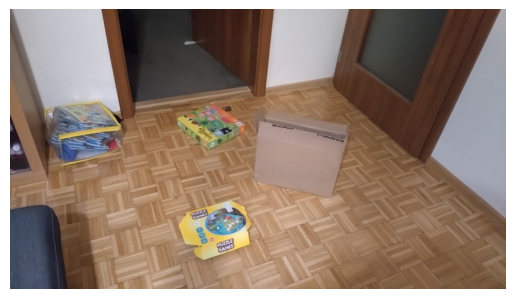

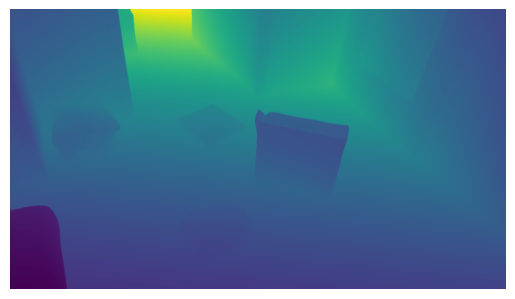

In [ ]:
# implement

### Exercise 2 - Finding a dominant plane with RANSAC

Now try to implent your own code for RANSAC to find the dominant plane.

You will probably need to implement:
* RANSAC loop
* Method for estimating 3D plane parameters from 3 points
* Method for estimating the distance of points from a given 3D plane

You method should have a threshold which can be used to check for inliers. In my experiments the value of 0.01 m worked quite well.

After estimating the plane plot out its mask. Try to plot out also the image with the dominat floor pixels turned dark.

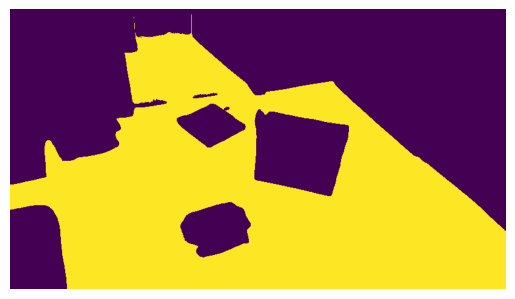

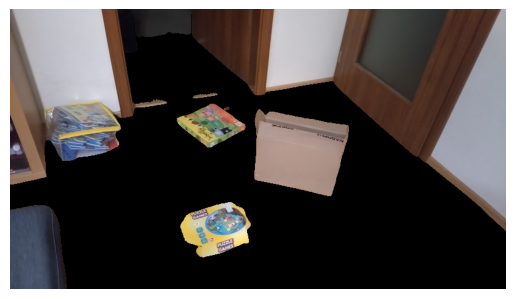

In [ ]:
# implement and visualize